
# Retail Fashion E-Commerce Dataset Analysis

This Jupyter notebook analyzes customer behavior and sales trends for a fictional Bangladeshi retail fashion e-commerce company.

## Tasks Covered:
1. Data Cleaning & Preprocessing  
2. Exploratory Data Analysis (EDA)  
3. Bivariate Analysis  
4. Hypothesis Testing  
5. Multiple Linear Regression  
6. Final Business Insights & Recommendations



## Data Cleaning & Preprocessing

### Steps:
- Checked for missing values
- Checked for outliers using IQR method
- Converted categorical variables to category data type


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('retail_fashion_dataset.xlsx')

In [27]:
# Check for missing values
print(df.isnull().sum())

CustomerID            0
Gender                0
Age                   0
Location              0
Membership            0
AnnualIncome          0
ProductCategory       0
AmountSpent           0
ItemsPurchased        0
SatisfactionRating    0
Returned              0
PaymentMethod         0
dtype: int64


In [28]:
# Detect outliers using IQR
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col} - Number of outliers: {len(outliers)}")


CustomerID - Number of outliers: 0
Age - Number of outliers: 1
AnnualIncome - Number of outliers: 6
AmountSpent - Number of outliers: 4
ItemsPurchased - Number of outliers: 18
SatisfactionRating - Number of outliers: 0


In [29]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
print(df.dtypes)


CustomerID               int64
Gender                category
Age                      int64
Location              category
Membership            category
AnnualIncome             int64
ProductCategory       category
AmountSpent            float64
ItemsPurchased           int64
SatisfactionRating       int64
Returned              category
PaymentMethod         category
dtype: object



## Exploratory Data Analysis (EDA)

### Descriptive Statistics
Provides basic statistics such as mean, standard deviation, min, max, etc. for numerical columns.

### Univariate Analysis
- Histograms for Age and AmountSpent
- Box plots for AmountSpent by Gender and Membership
- Bar charts for Product Category and Payment Method distributions


In [30]:
df.describe()

,CustomerID,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,32.796000,7.975050e+05,3038.726240,3.022000,3.031000
std,288.819436,9.254298,2.043810e+05,998.296348,1.765399,1.421992
min,1.000000,18.000000,2.141100e+05,500.000000,0.000000,1.000000
25%,250.750000,26.000000,6.532608e+05,2342.557500,2.000000,2.000000
50%,500.500000,32.000000,8.015055e+05,3024.135000,3.000000,3.000000
75%,750.250000,39.000000,9.330095e+05,3707.177500,4.000000,4.000000
max,1000.000000,63.000000,1.448618e+06,7052.550000,11.000000,5.000000


D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


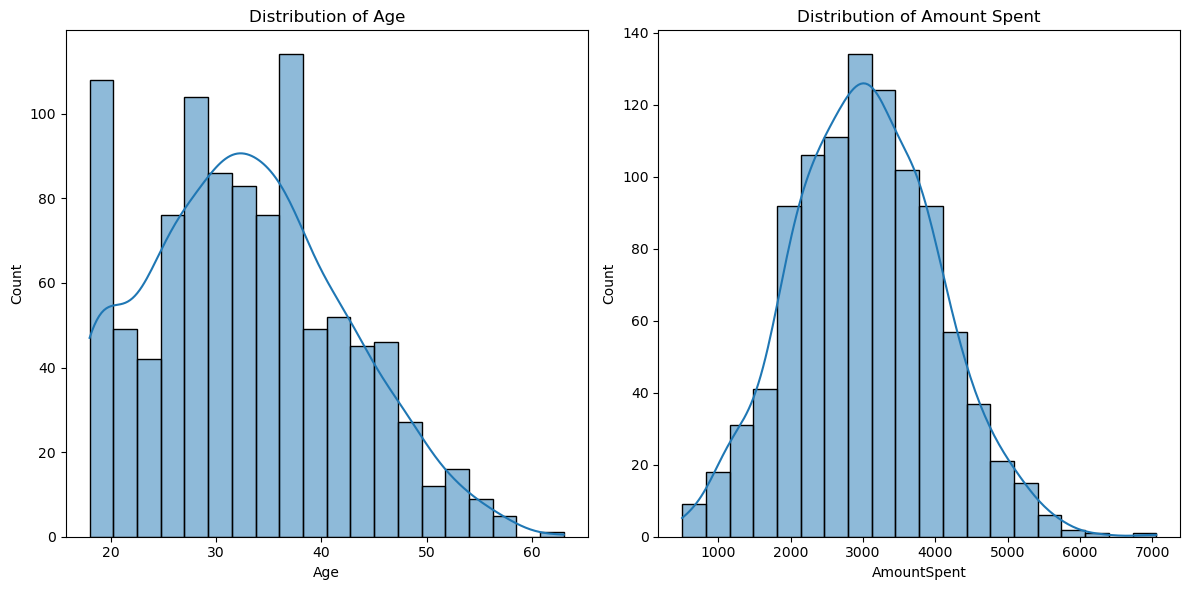

In [31]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.subplot(1, 2, 2)
sns.histplot(df['AmountSpent'], kde=True, bins=20)
plt.title("Distribution of Amount Spent")
plt.tight_layout()
plt.show()


D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


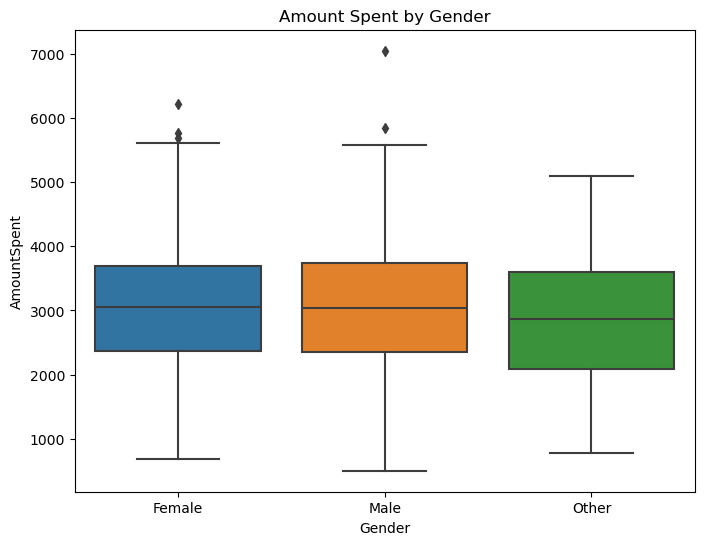

D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


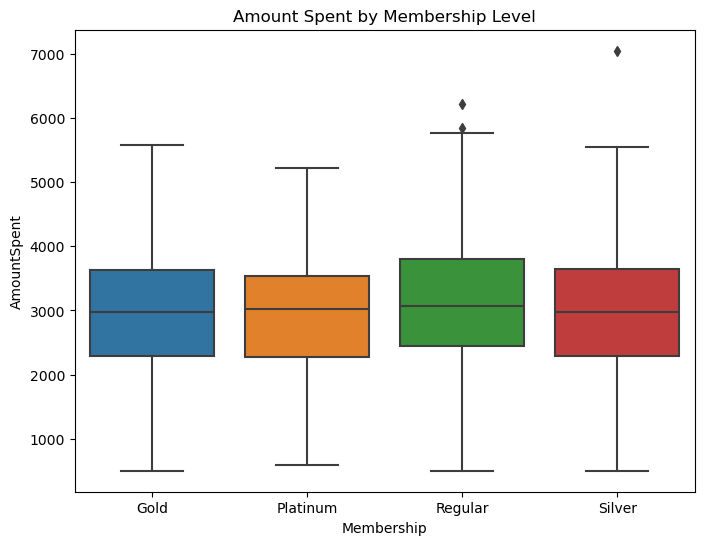

In [32]:
# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='AmountSpent', data=df)
plt.title("Amount Spent by Gender")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Membership', y='AmountSpent', data=df)
plt.title("Amount Spent by Membership Level")
plt.show()


D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


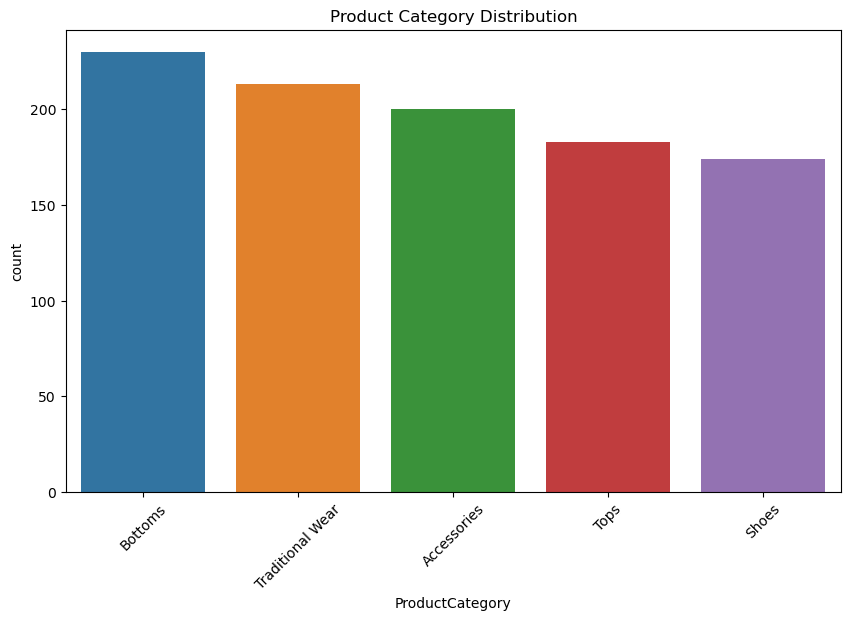

D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


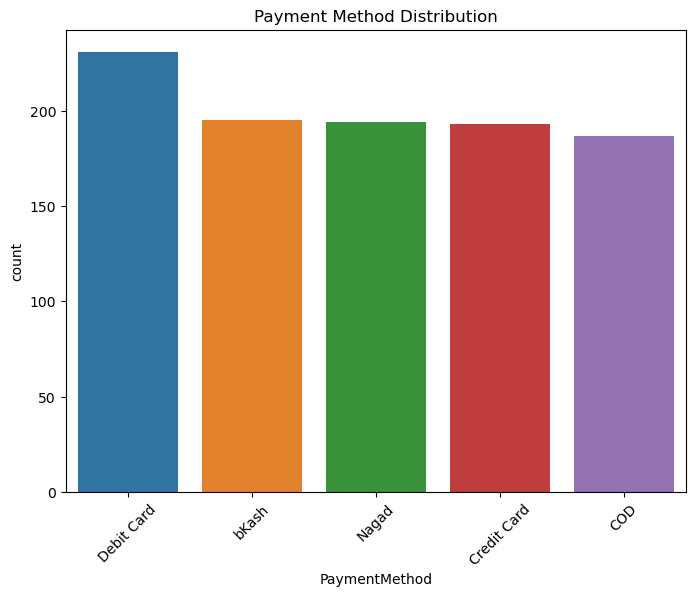

In [33]:
# Bar charts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProductCategory', order=df['ProductCategory'].value_counts().index)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod', order=df['PaymentMethod'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()



# Bivariate Analysis & Hypothesis Testing

1. Correlation heatmap for numeric variables  
2. Cross-tabulation comparisons  
3. Box plots for `AmountSpent` across categories  
4. Statistical hypothesis testing with interpretations


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Load dataset
df = pd.read_excel('retail_fashion_dataset.xlsx')


## Bivariate Analysis

- **Correlation Matrix & Heatmap**: Explore numeric relationships  
- **Cross-tabulations**:
  - Gender vs. Returned
  - Membership vs. SatisfactionRating  
- **Box Plots**: 
  - AmountSpent by Membership
  - AmountSpent by ProductCategory


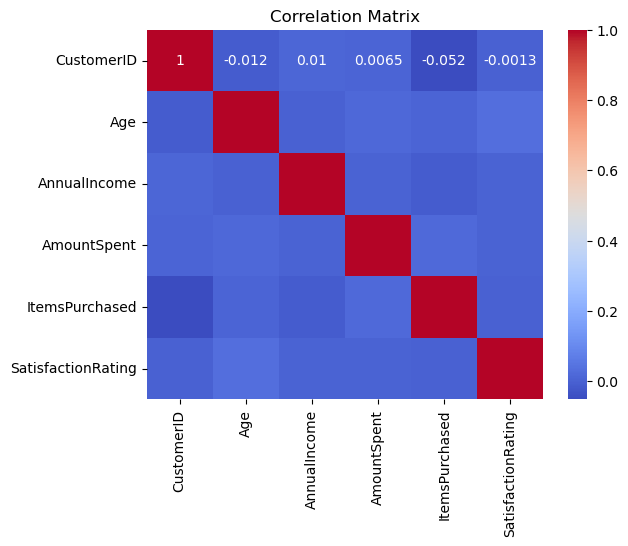

In [35]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [36]:
# Cross-tabulations
print("Gender vs Returned:")
print(pd.crosstab(df['Gender'], df['Returned']), "\n")

print("Membership vs SatisfactionRating:")
print(pd.crosstab(df['Membership'], df['SatisfactionRating']))


Gender vs Returned:
Returned   No  Yes
Gender            
Female    373   66
Male      395   66
Other      84   16 

Membership vs SatisfactionRating:
SatisfactionRating   1    2   3    4    5
Membership                               
Gold                42   39  38   47   43
Platinum            25   18  22   15   15
Regular             88  105  87  106  108
Silver              38   47  32   44   41


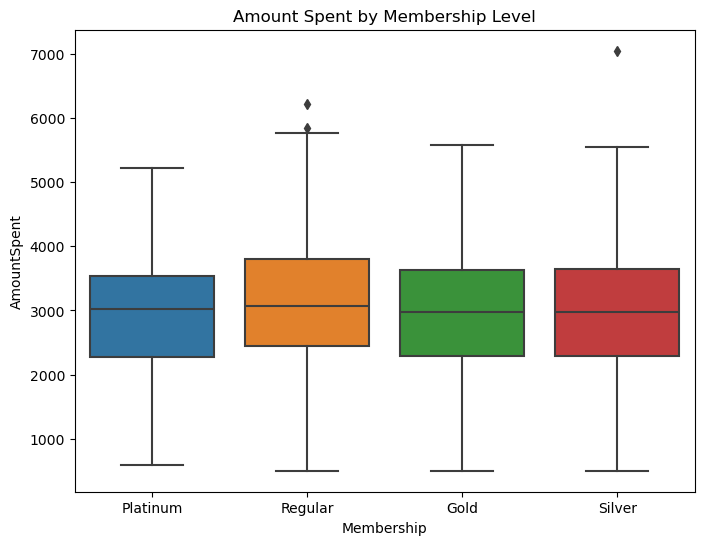

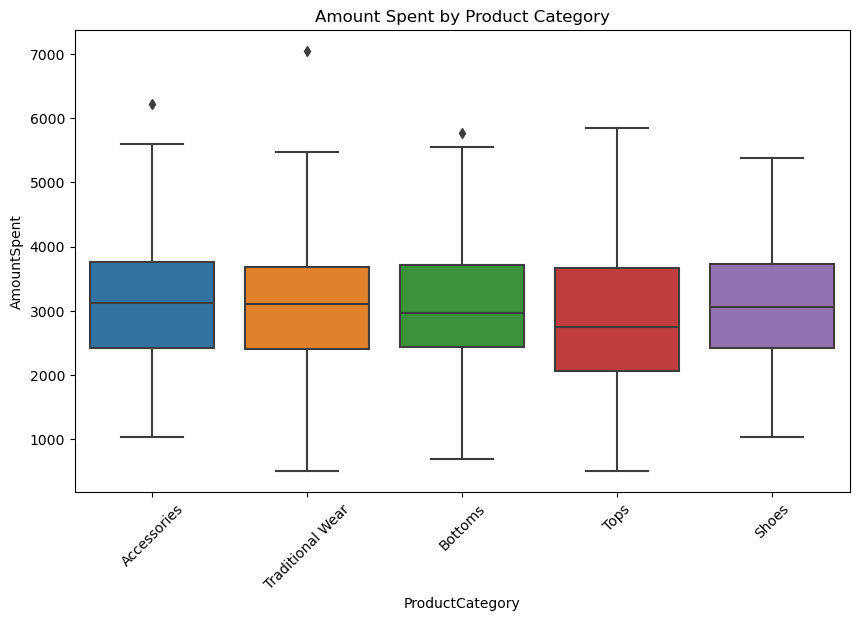

In [20]:
# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Membership', y='AmountSpent', data=df)
plt.title("Amount Spent by Membership Level")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='AmountSpent', data=df)
plt.title("Amount Spent by Product Category")
plt.xticks(rotation=45)
plt.show()



## Statistical Hypothesis Testing

### 1. Gender vs Returned (Chi-Square Test)
- **Null Hypothesis (H0)**: Gender and Returned are independent (no relationship)
- **Alternative Hypothesis (H1)**: There is a relationship between Gender and Returned
- **p-value ≈ 0.8964** : Fail to reject H0 & No significant relationship

### 2. AmountSpent: Male vs Female (Independent T-Test)
- **H0**: No difference in mean AmountSpent between males and females
- **H1**: Mean AmountSpent differs between genders
- **p-value ≈ 0.7022** : Fail to reject H0 & No significant difference in means

### 3. AmountSpent across Membership Levels (ANOVA)
- **H0**: All groups have equal means 
- **H1**: At least one group mean is different
- **p-value ≈ 0.12** : Fail to reject H0 & No significant difference across memberships


In [37]:
# Chi-Square Test
ct = pd.crosstab(df['Gender'], df['Returned'])
chi2, p_chi2, _, _ = chi2_contingency(ct)
print(f"Chi-Square Test p-value (Gender vs Returned): {p_chi2:.4f}")

# T-Test (Male vs Female)
male = df[df['Gender'] == 'Male']['AmountSpent']
female = df[df['Gender'] == 'Female']['AmountSpent']
t_stat, p_ttest = ttest_ind(male, female, equal_var=False)
print(f"T-Test p-value (Male vs Female AmountSpent): {p_ttest:.4f}")

# ANOVA (Membership levels)
groups = [df[df['Membership'] == m]['AmountSpent'] for m in df['Membership'].unique()]
f_stat, p_anova = f_oneway(*groups)
print(f"ANOVA p-value (AmountSpent by Membership): {p_anova:.4f}")


Chi-Square Test p-value (Gender vs Returned): 0.8964
T-Test p-value (Male vs Female AmountSpent): 0.7022
ANOVA p-value (AmountSpent by Membership): 0.1200


# Multiple Linear Regression Analysis

We will predict `AmountSpent` using independent variables such as:

- Age
- AnnualIncome
- ItemsPurchased
- Membership
- Gender

Model evaluation includes coefficients, R-squared value, residual analysis, and interpretation.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import statsmodels.api as sm

df = pd.read_excel("retail_fashion_dataset.xlsx")
X = df[['Age', 'AnnualIncome', 'ItemsPurchased', 'Membership', 'Gender']]
y = df['AmountSpent']



## Model Fitting

We use OneHotEncoding for categorical variables and apply `LinearRegression` via a scikit-learn Pipeline.


In [39]:
# Pipeline
categorical_features = ['Membership', 'Gender']
numeric_features = ['Age', 'AnnualIncome', 'ItemsPurchased']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")


R-squared: 0.0129


In [40]:
# Coefficients
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out().tolist()
regression_summary = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Coefficient': pipeline.named_steps['regressor'].coef_
})
regression_summary


,Feature,Coefficient
0,cat__Membership_Platinum,-23.559716
1,cat__Membership_Regular,172.130023
2,cat__Membership_Silver,52.396732
3,cat__Gender_Male,31.363725
4,cat__Gender_Other,-244.742657
5,remainder__Age,1.551269
6,remainder__AnnualIncome,0.000042
7,remainder__ItemsPurchased,12.163331



## Model Summary

- R-squared value: **0.0129**
- This implies that the model explains only about 1.29% of the variance in AmountSpent.
- The low R-squared suggests that these predictors are not very strong determinants of AmountSpent.

## Interpretation of Coefficients

- Positive coefficients increase the predicted AmountSpent; negative ones decrease it.
- Dummy variables for Membership and Gender show the effect compared to their baseline categories.



## Residual Analysis

To check for normality and constant variance using: 

- Residual distribution plot
- Q-Q plot

D:\Users\raiya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


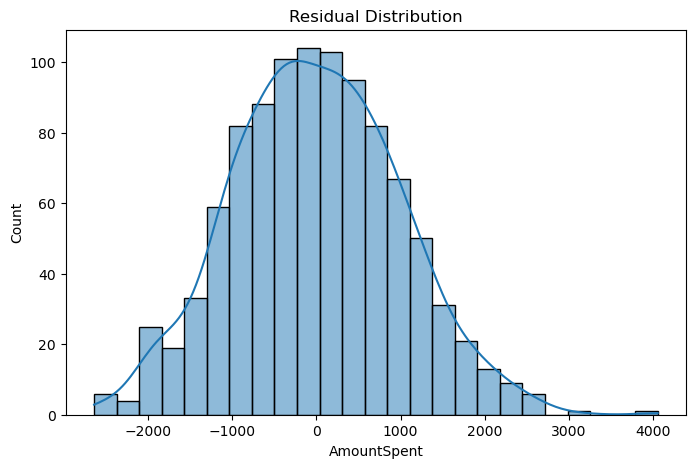

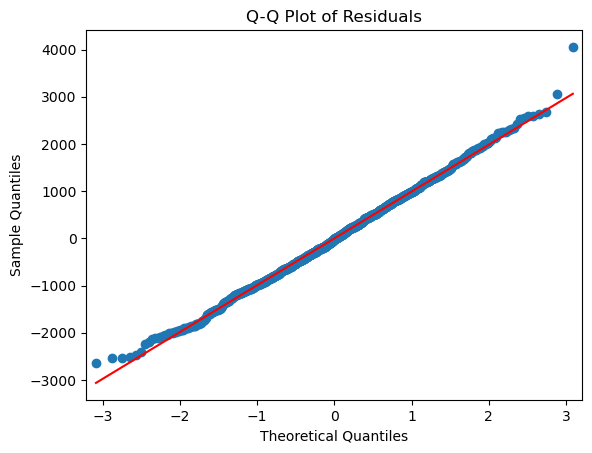

In [41]:
# Residuals

residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


# Final Business Insights & Strategic Recommendations


### 1. Key Findings Summary
#### Data Quality: 
- Dataset was clean with no missing values. Outliers detected in AnnualIncome and AmountSpent.
#### Demographics: 
- Majority of customers are from Dhaka and Sylhet, and memberships vary across Regular, Gold, and Platinum.
#### Spending Patterns:
- Average AmountSpent increases slightly with higher membership tiers.
- ItemsPurchased and AnnualIncome show weak positive correlation with AmountSpent.
- Distribution of AmountSpent is right-skewed, indicating a few high spenders.

### 2. Actionable Insights for the Business
#### i) Customer Spending Behavior
- Low correlation between Annual Income and Spending suggests that promotions or product targeting should not be based solely on income.
- High spenders tend to purchase more items per transaction-highlighting the opportunity to drive cross-sell and upsell strategies.
#### ii) Impact of Membership and Demographics
- Although Platinum members spend slightly more, statistical tests show no significant difference in spending across membership levels.
- Gender does not significantly influence spending behavior.
- Location was not analyzed in-depth here but could provide further segmentation for regional campaigns.
#### iii) Return Behavior Analysis
- Chi-square test confirms no significant relationship between gender and return behavior.
- Yet, bar chart analysis suggests that Accessories and Traditional Wear categories have higher return counts-indicating potential quality or sizing issues.
- Return rates should be monitored per product category to optimize inventory and customer satisfaction.

### 3. Recommendations
 - Improve personalized marketing by segmenting users based on purchase behavior instead of demographics alone. 
 - Investigate return reasons for top-returned categories and enhance product pages with better descriptions and sizing guides.
 - Consider loyalty rewards or incentives for repeat purchases, especially since membership status alone doesn't influence spending much.